## Data from EQ-evolution

In [11]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14
import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)


In [12]:
redshifts=[1000, 500,100,50,10,3,1,0];
# redshifts=[100];
address_ref='/Users/farbod/Packages/class_public-2.7.1//output/'

address_ref2='./../../EQ_hi_class/output/'

address_ref3='./../../EQ_hi_class/output/'

for i in range(np.shape(redshifts)[0]):
    data['class_tk']['newt']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"class_new_z"+str(i+1)+"_tk.dat")
#     data['class_pk']['newt']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"class_new_z"+str(i+1)+"_pk.dat")

    data['class-tk']['sync']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"class_sync_z"+str(i+1)+"_tk.dat")
#     data['class-pk']['sync']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"class_sync_z"+str(i+1)+"_pk.dat")
    
    data['hi-tk']['newt']['z='+str(redshifts[i])] = np.loadtxt(address_ref2+"class_new_z"+str(i+1)+"_tk.dat")
#     data['hi-pk']['newt']['z='+str(redshifts[i])] = np.loadtxt(address_ref2+"class_new_z"+str(i+1)+"_pk.dat")

    data['hi-tk']['sync']['z='+str(redshifts[i])] = np.loadtxt(address_ref2+"class_sync_z"+str(i+1)+"_tk.dat")
#     data['hi-pk']['sync']['z='+str(redshifts[i])] = np.loadtxt(address_ref2+"class_sync_z"+str(i+1)+"_pk.dat")
    

    data['eq-tk']['sync']['z='+str(redshifts[i])] = np.loadtxt(address_ref3+"hiclass_z"+str(i+1)+"_tk.dat")
#     data['eq-pk']['sync']['z='+str(redshifts[i])] = np.loadtxt(address_ref3+"hiclass_z"+str(i+1)+"_pk.dat")

#     data['hiclass_tk']['z='+str(redshifts[i])] = np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_tk.dat")
#     data['hiclass_pk']['z='+str(redshifts[i])] = np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_pk.dat")

data['class']['bg']['newt']= np.loadtxt(address_ref+"class_new_background.dat")
data['class']['bg']['sync']= np.loadtxt(address_ref+"class_sync_background.dat")
data['hiclass']['bg']['newt']= np.loadtxt(address_ref2+"class_new_background.dat")
data['hiclass']['bg']['sync']= np.loadtxt(address_ref2+"class_sync_background.dat")
data['EQhiclass']['bg']['sync']= np.loadtxt(address_ref3+"hiclass_background.dat")

# Hconf_hiclass =data['hiclass']['bg']['newt']= np.loadtxt("./../../EQ_hi_class/output/quin_background.dat")
#  interpolate.interp1d(1./(1.+bg[:,0]) ,bg[:,3])




In [13]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)
# plt.figure(figsize=(12,12))

# # f = np.loadtxt("/Users/farbod/Packages/class_public-2.7.1//output/class_sync_z1_tk.dat")
# # plt.plot(f[:,0],f[:,6],".")

# # f = np.loadtxt("/Users/farbod/Packages/class_public-2.7.1//output/class_new_z1_tk.dat")
# # plt.plot(f[:,0],f[:,6],".")

# f = np.loadtxt("./../../EQ_hi_class/output/class_sync_z4_tk.dat")
# plt.plot(f[:,0],f[:,6],".")

# f = np.loadtxt("./../../EQ_hi_class/output/class_new_z4_tk.dat")
# plt.plot(f[:,0],f[:,7],".")

# f = np.loadtxt("./../../EQ_hi_class/output/quin_z4_tk.dat")
# plt.plot(f[:,0],f[:,9],".")

# plt.yscale('log')
# plt.xscale('log')

# Background comparisons

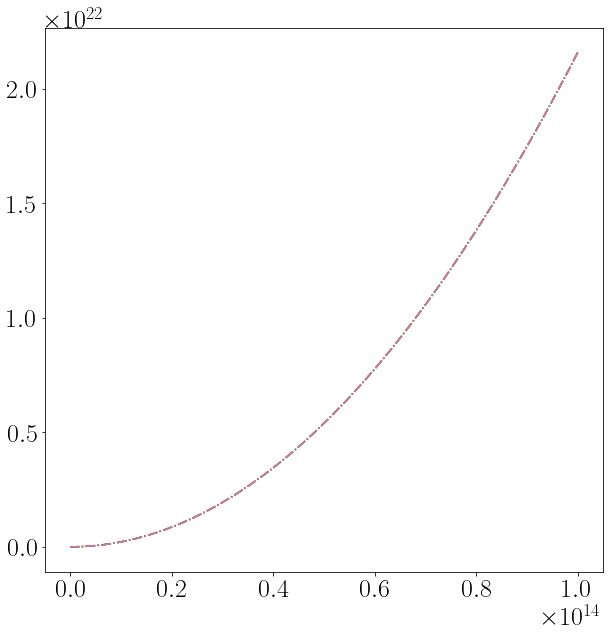

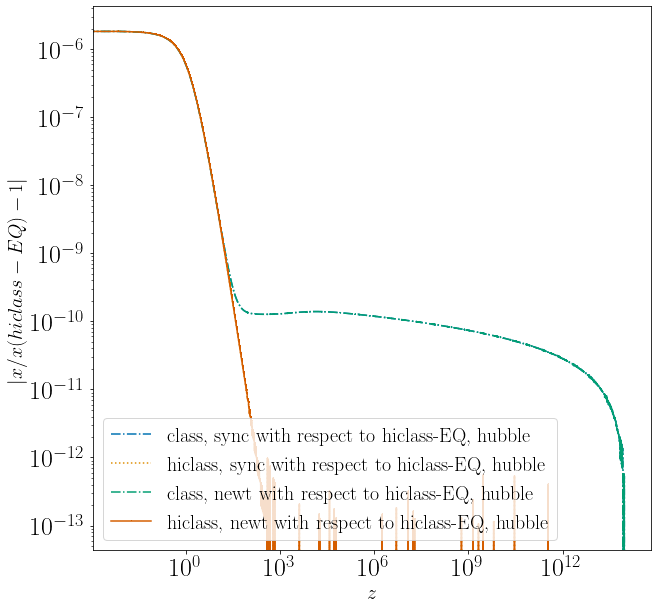

In [14]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))

l=0
column = 3
for gauge in ['sync', 'newt']:
    for files in ['class', 'hiclass']:
        data_p = data[files]['bg'][gauge]
        a = data_p[:,0]
        b = data_p[:,column]
        plt.plot(a, b,"-.", color = Colors[l] , label =files + ", "+gauge)
        l=l+1
a=  data['EQhiclass']['bg']['sync'][:,0]
b = data['EQhiclass']['bg']['sync'][:,column]
plt.plot(a, b,"-.", color = Colors[l] , label ="EQhiclass" + ", sync")


########## Rel difference:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))

l=0
column = 3
ref_file = data['EQhiclass']['bg']['sync']

linestyle = ["-.",":","-.","-,"]
for gauge in ['sync', 'newt']:
    for files in ['class', 'hiclass']:
        
        data_p = data[files]['bg'][gauge]
        a = data_p[:,0]
        b = data_p[:,column]
        b_ref = ref_file[:,column]
        plt.plot(a, np.abs((b/b_ref)-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+" with respect to hiclass-EQ, hubble")
        l=l+1
plt.ylabel("$|x/x(hiclass-EQ)-1|$",fontsize=20)
plt.xlabel("$z$",fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)


# Transfer functions comparison

## Synchronous gauge comparisons

###### This is a check to see if there is a mistake in Eq-class implementation!

# tot

## d_tot

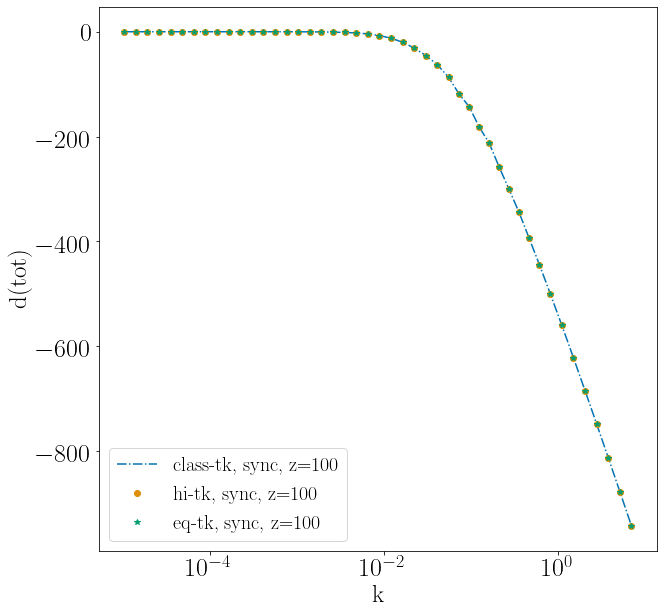

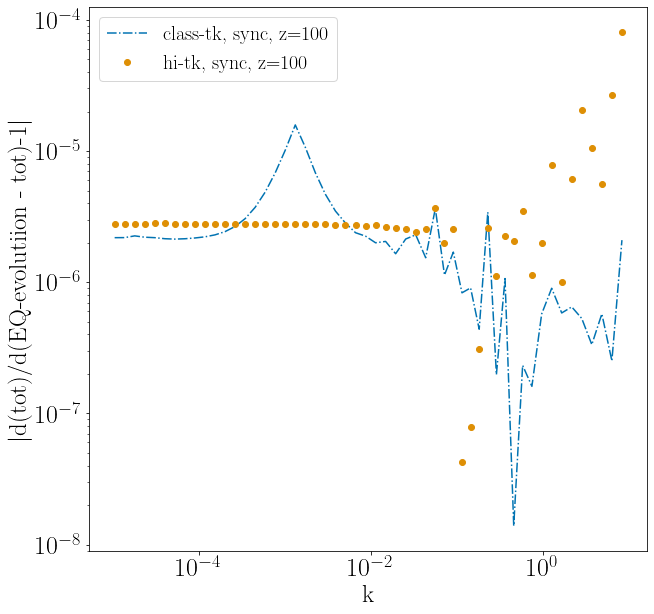

In [36]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))

l=0
column = 5
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 8
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 7
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('d(tot)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)

######### Rel difference:
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
numb = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
l=0
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        column = 5
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 7
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('$|$d(tot)/d(EQ-evolutiion - tot)-1$|$',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)


## t_tot

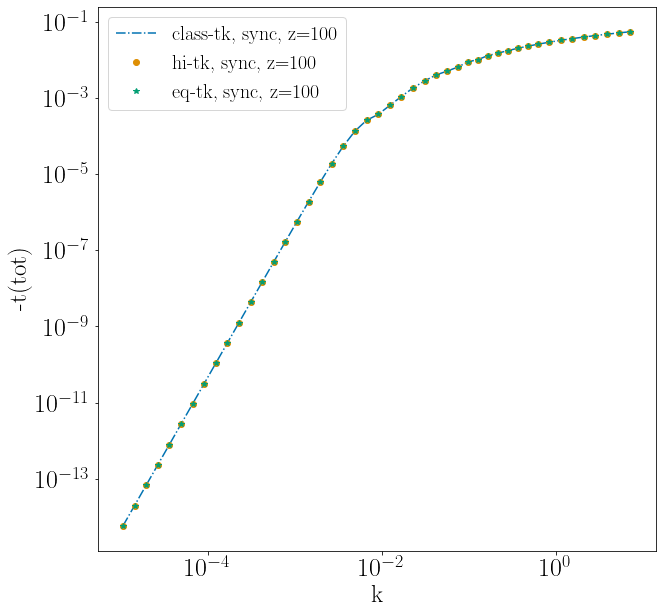

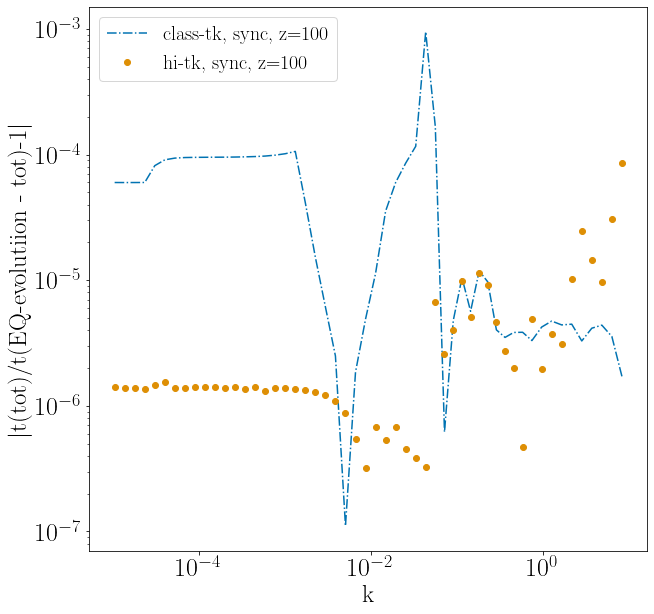

In [47]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))

l=0

linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 8

column = 15
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, -b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1


column = 17
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, -b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 19
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, -b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
plt.yscale('log')
plt.ylabel('-t(tot)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)

######### Rel difference:
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
numb = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
l=0
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        column = 15
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 19
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        column = 17
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 19
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('$|$t(tot)/t(EQ-evolutiion - tot)-1$|$',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)


# cdm

## d_cdm

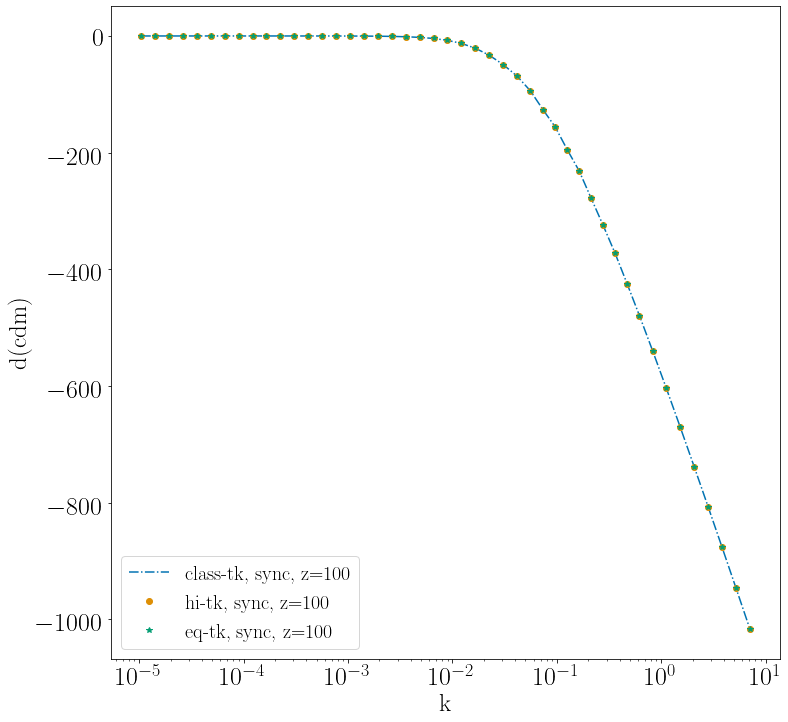

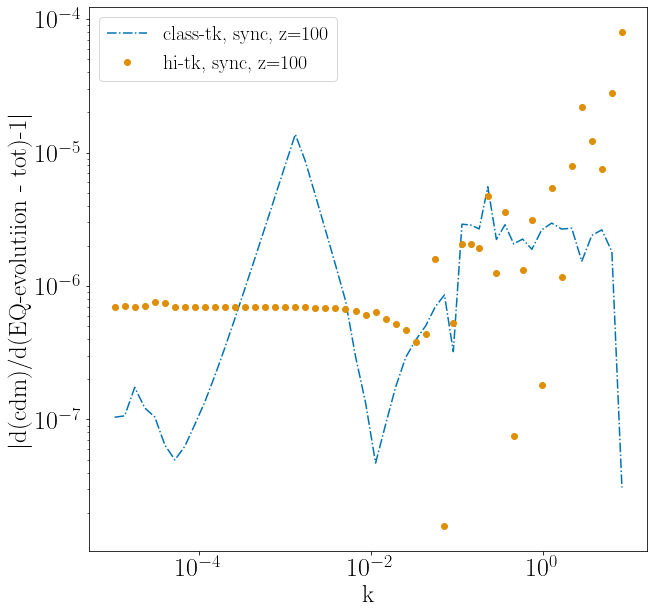

In [53]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 8

column = 3

for files in ['class-tk','hi-tk', 'eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z=100")
        l=l+1

# plt.yscale('log')
plt.ylabel('d(cdm)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)


######### Rel difference:
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
numb = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
l=0
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        column = 3
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 3
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('$|$d(cdm)/d(EQ-evolutiion - tot)-1$|$',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)




## t_cdm SHOULD be 0

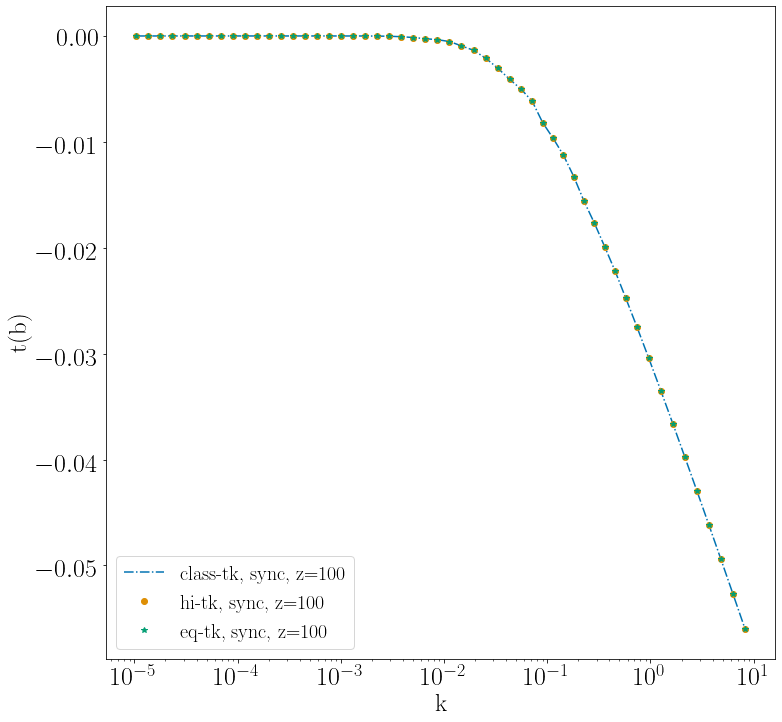

In [52]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)
# plt.figure(figsize=(12,12))


# l=0
# column = 15
# linestyle = ["-.","o","*","-,"]
# gauge = 'sync'
# numb = 7
# for files in ['class-tk']:
#     for z in [100]:
# #         print(z, files)
#         data_p = data[files]['sync']['z='+str(z)]
#         a = data_p[::numb,0]
#         b = data_p[::numb,column]
#         plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
#         l=l+1


# column = 17
# linestyle = ["-.","o","*","-,"]
# gauge = 'sync'
# numb = 7
# for files in ['hi-tk']:
#     for z in [100]:
# #         print(z, files)
#         data_p = data[files]['sync']['z='+str(z)]
#         a = data_p[::numb,0]
#         b = data_p[::numb,column]
#         plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
#         l=l+1

# column = 19
# for files in ['eq-tk']:
#     for z in [100]:
# #         print(z, files)
#         data_p = data[files]['sync']['z='+str(z)]
#         a = data_p[::numb,0]
#         b = data_p[::numb,column]
#         plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
#         l=l+1
# # plt.yscale('log')
# plt.ylabel('t(b)',fontsize=25)
# plt.xlabel('k',fontsize=25)

# plt.xscale('log')
# plt.legend(fontsize=20)




# b

## d_b

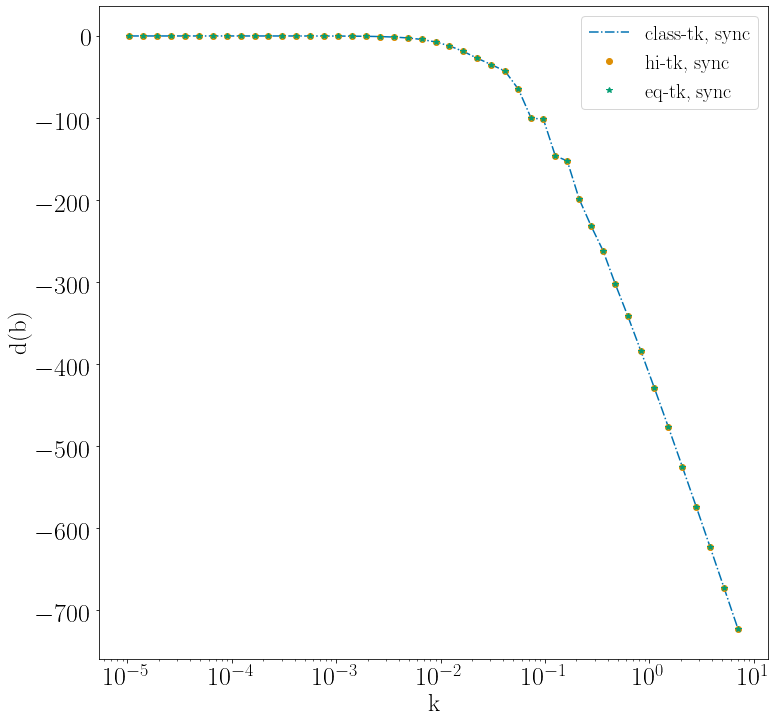

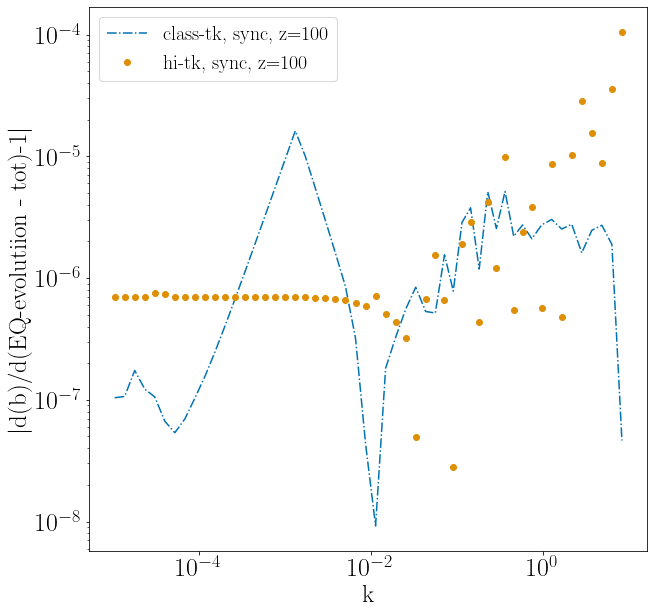

In [62]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 2
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 8
for files in ['class-tk','hi-tk', 'eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge)
        l=l+1

# plt.yscale('log')
plt.ylabel('d(b)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)



######### Rel difference:
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
numb = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
l=0
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        column = 2
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 2
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('$|$d(b)/d(EQ-evolutiion - tot)-1$|$',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)

## t_b

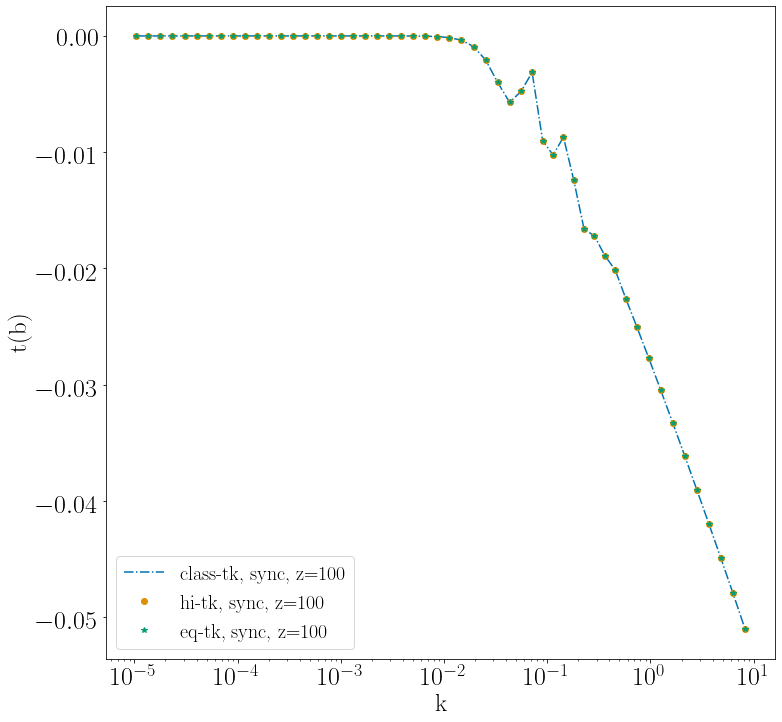

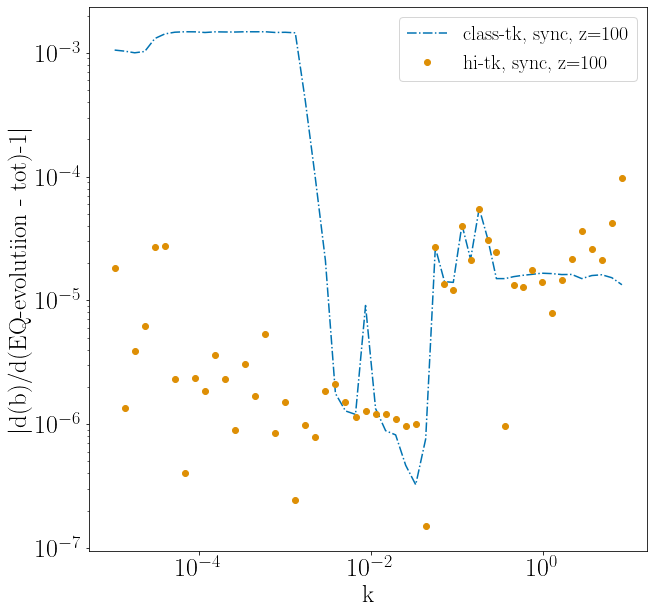

In [64]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))


l=0

linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
column = 13
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1



linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
column = 15
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 17
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('t(b)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)



######### Rel difference:
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
numb = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
l=0
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        column = 13
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 17
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        column = 15
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 17
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

# plt.yscale('log')
plt.ylabel('$|$d(b)/d(EQ-evolutiion - tot)-1$|$',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)



# g and radiation

## d_g

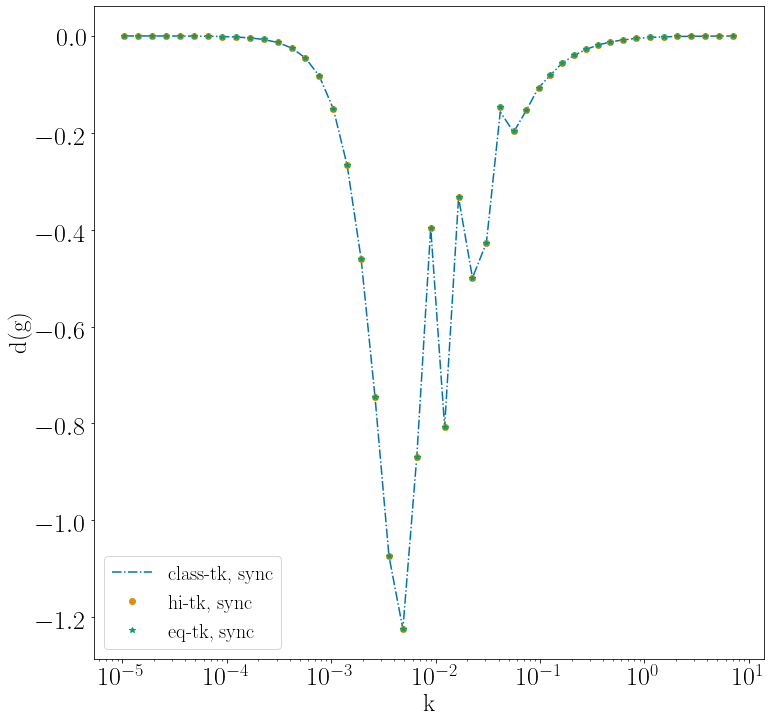

In [65]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 1
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 8
for files in ['class-tk','hi-tk', 'eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge)
        l=l+1

# plt.yscale('log')
plt.ylabel('d(g)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




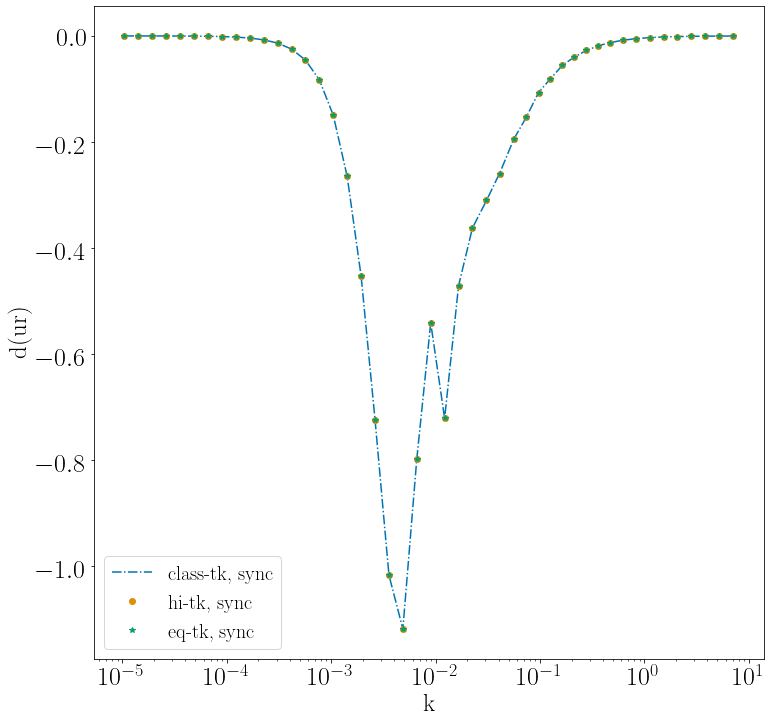

In [19]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 4
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 8
for files in ['class-tk','hi-tk', 'eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge)
        l=l+1

# plt.yscale('log')
plt.ylabel('d(ur)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




## t_g

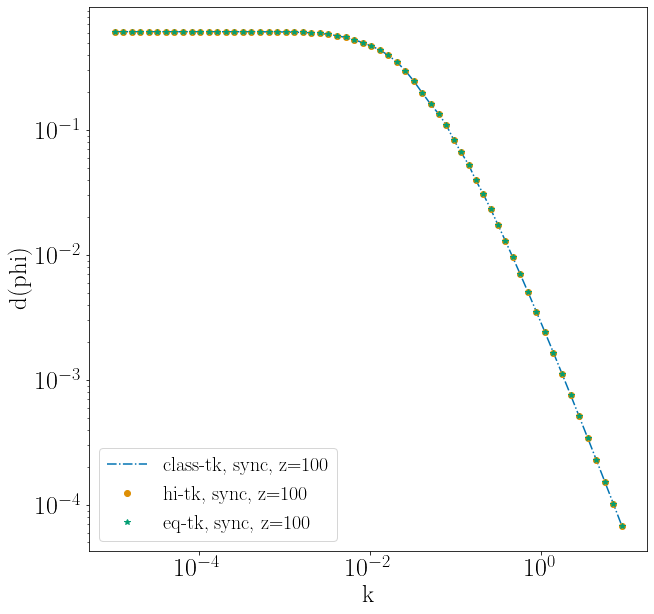

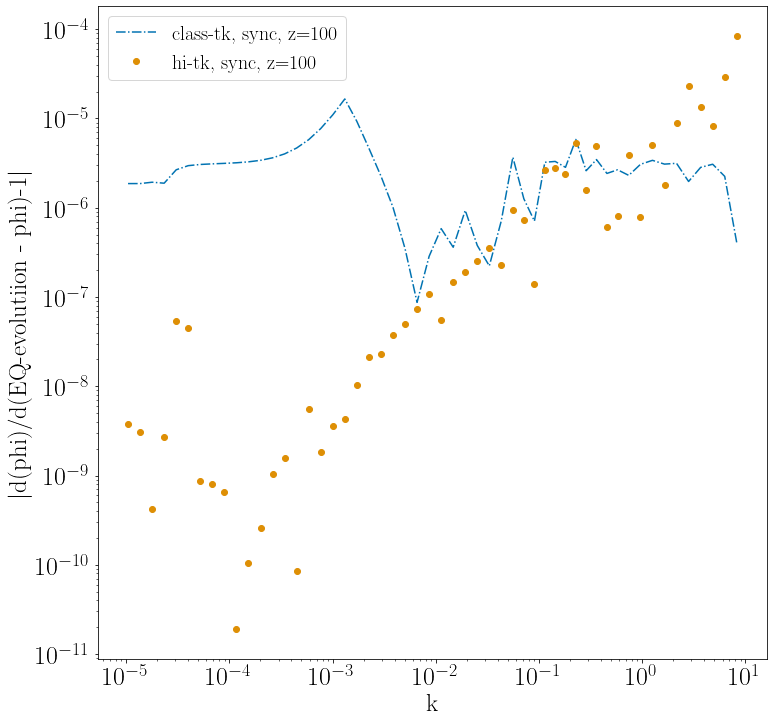

In [33]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))

l=0

linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 6

column = 6
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 8
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('d(phi)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)

######### Rel difference:
matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))
numb = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
l=0
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        column = 6
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 8
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

# plt.yscale('log')
plt.ylabel('$|$d(phi)/d(EQ-evolutiion - phi)-1$|$',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)




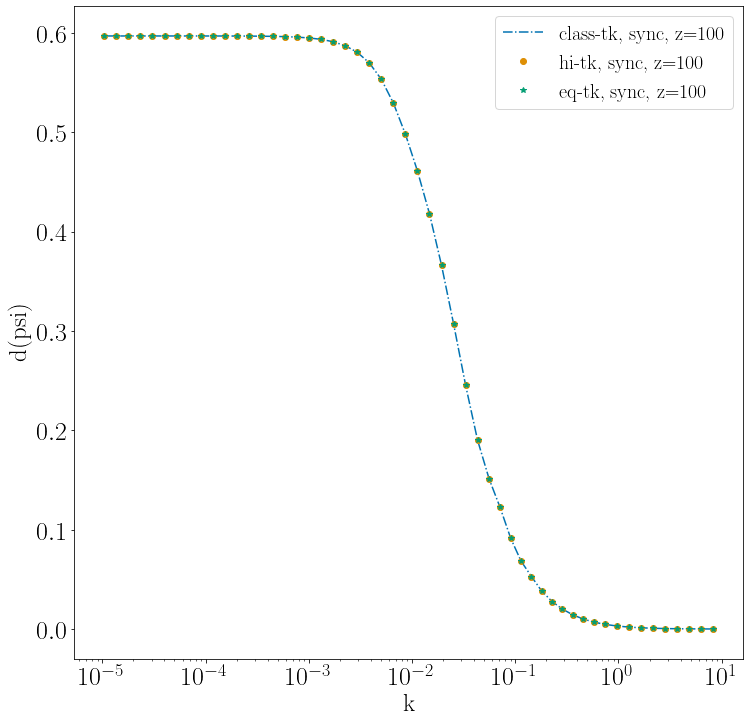

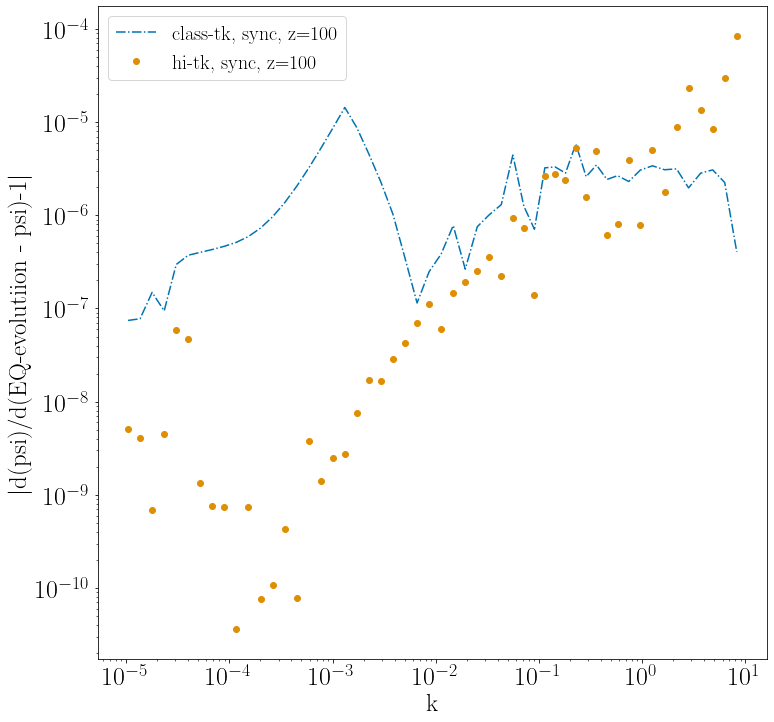

In [31]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0

numb = 7
column = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'

for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 9
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
        # plt.yscale('log')
plt.ylabel('d(psi)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)

        
######### Rel difference:
matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))
numb = 7
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
l=0
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        column = 7
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]

        data_p_ref= data['eq-tk']['sync']['z='+str(z)]
        column = 9
        a_ref = data_p_ref[::numb,0]
        b_ref= data_p_ref[::numb,column]
        plt.plot(a, np.abs(b/b_ref-1),linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

# plt.yscale('log')
plt.ylabel('$|$d(psi)/d(EQ-evolutiion - psi)-1$|$',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)




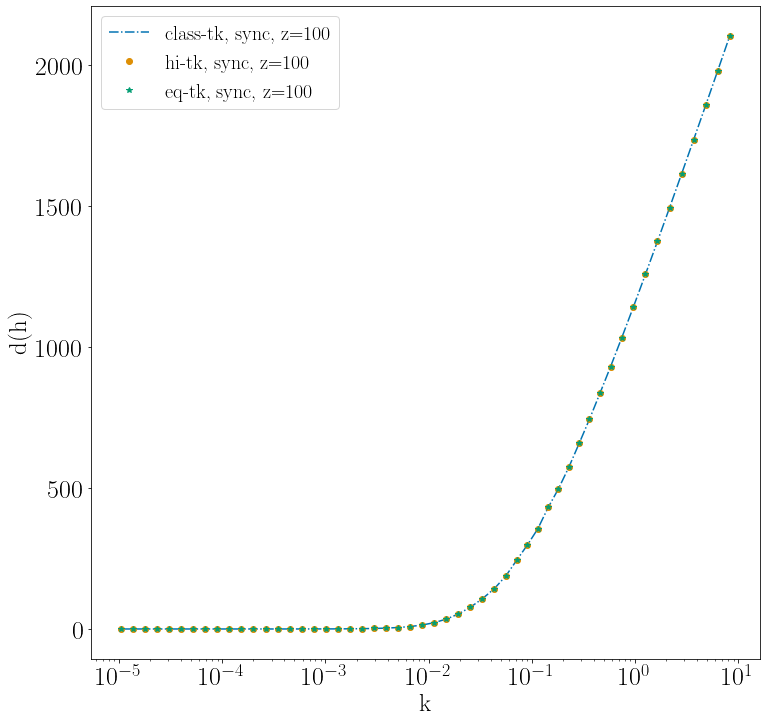

In [86]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 8
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 10
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('d(h)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




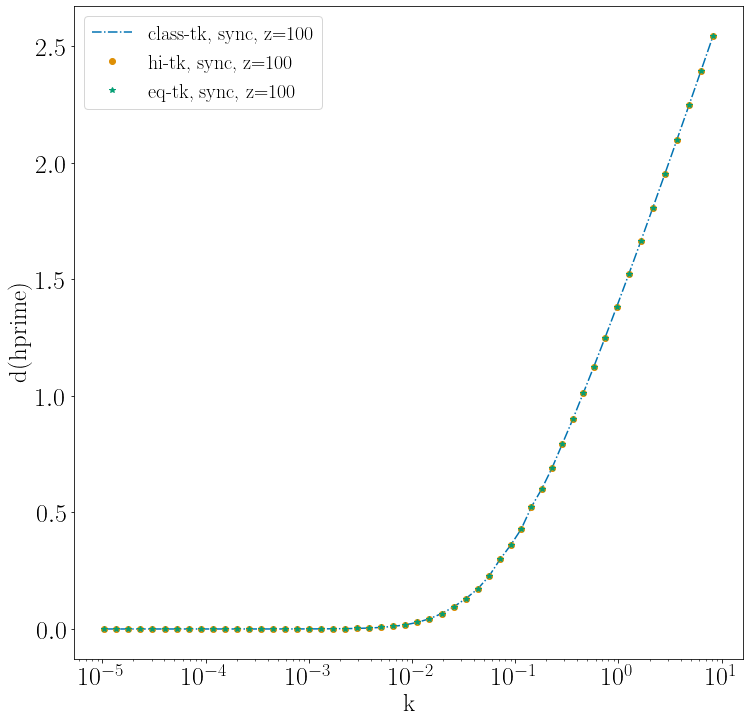

In [90]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 9
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 11
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('d(hprime)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




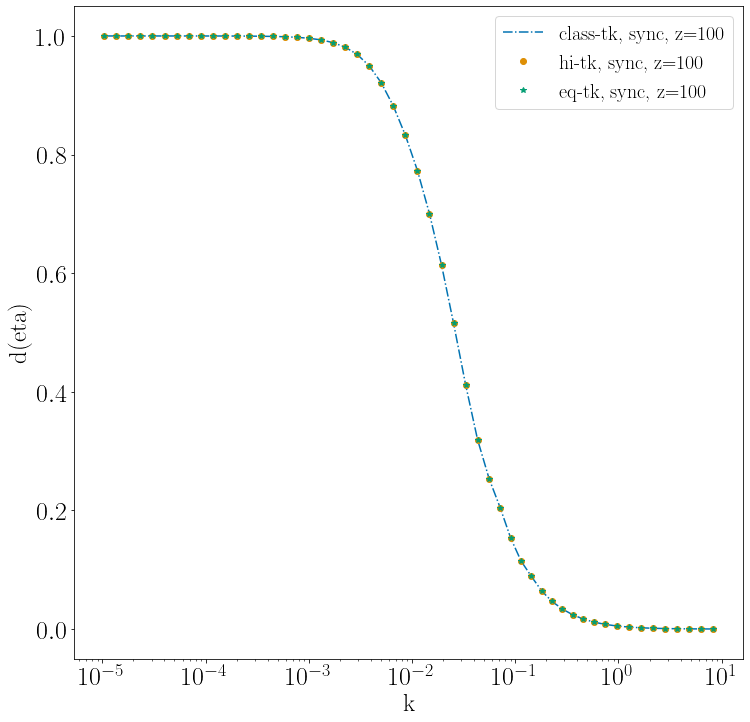

In [91]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 10
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 12
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('d(eta)',fontsize=25)a
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




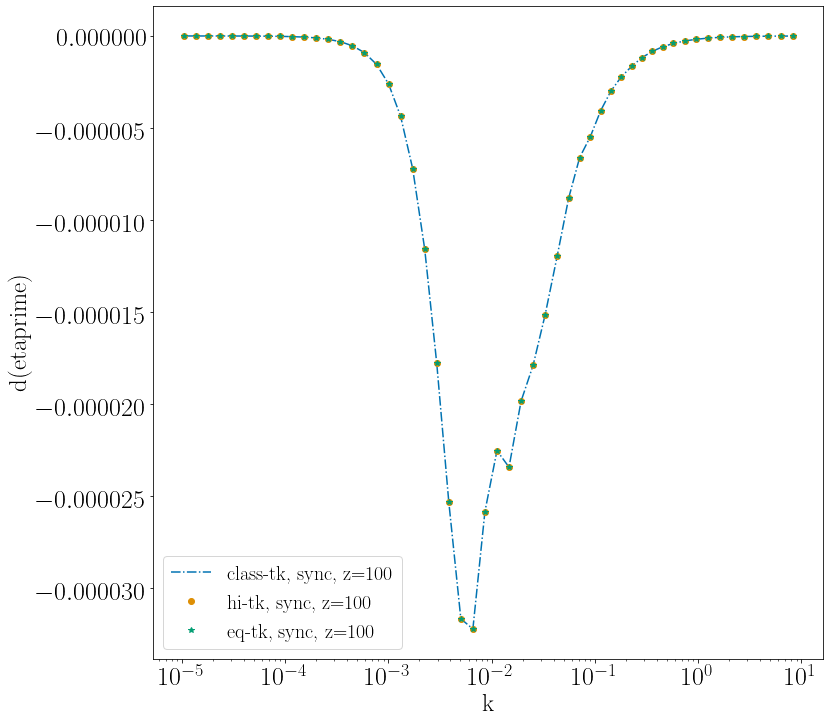

In [94]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 11
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 13
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('d(etaprime)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




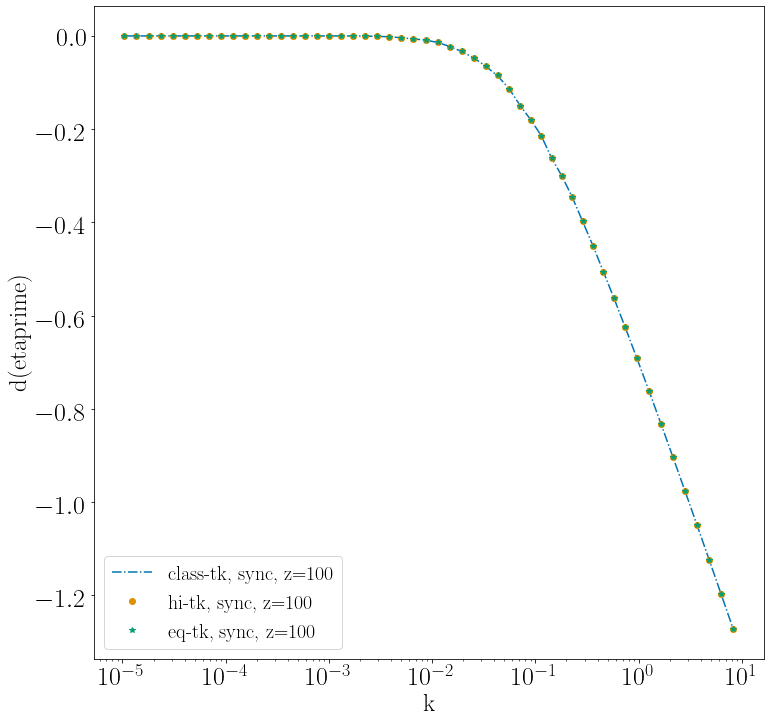

In [95]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))

l=0
column = 14
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk','hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 16
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('t(g)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




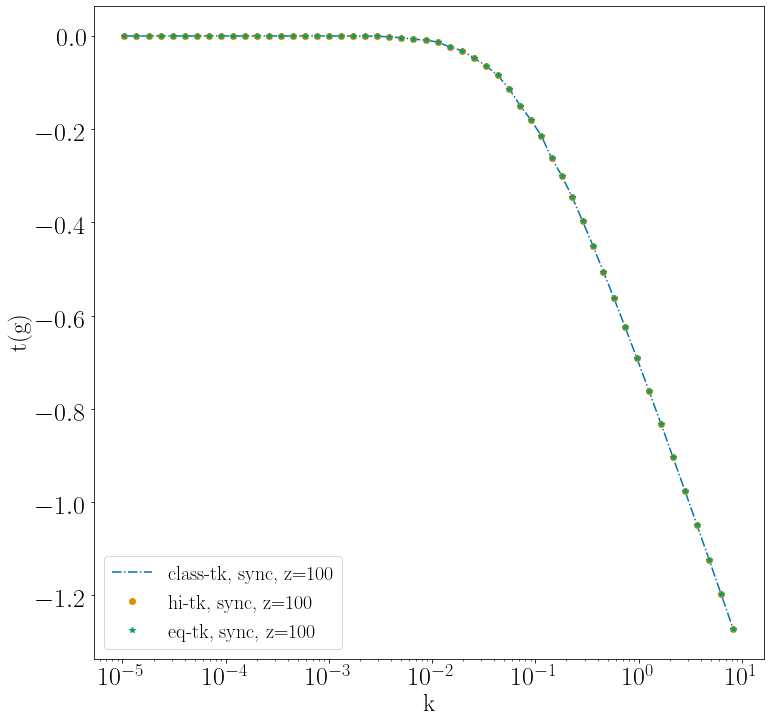

In [101]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))


l=0
column = 12
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1


column = 14
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 16
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('t(g)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




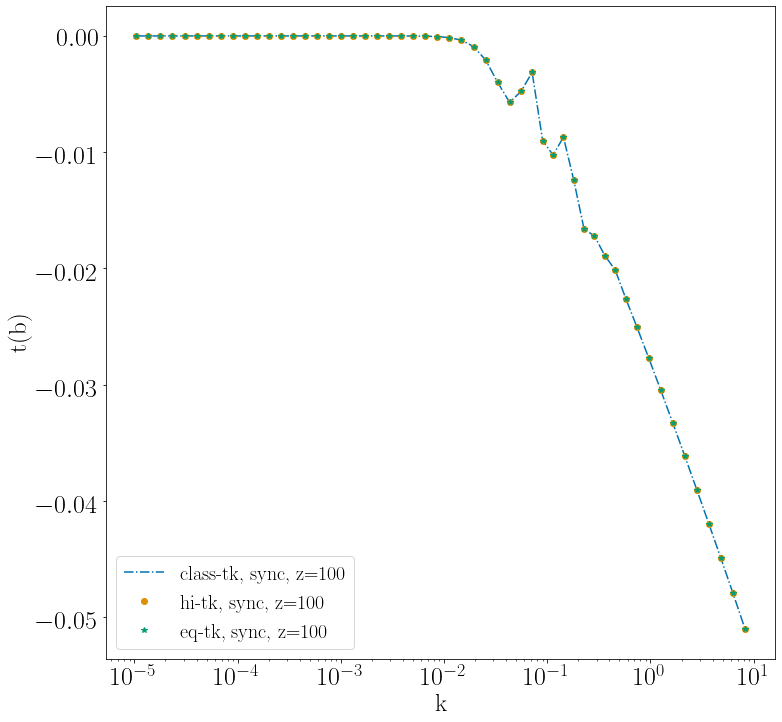

In [103]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))


l=0
column = 13
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1


column = 15
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 17
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('t(b)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




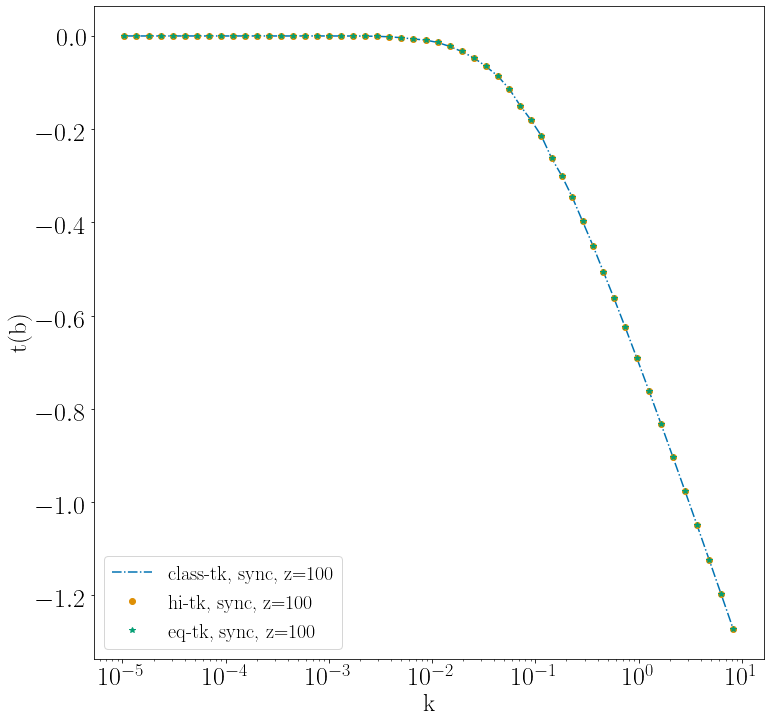

In [104]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))


l=0
column = 14
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1


column = 16
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 18
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('t(b)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)




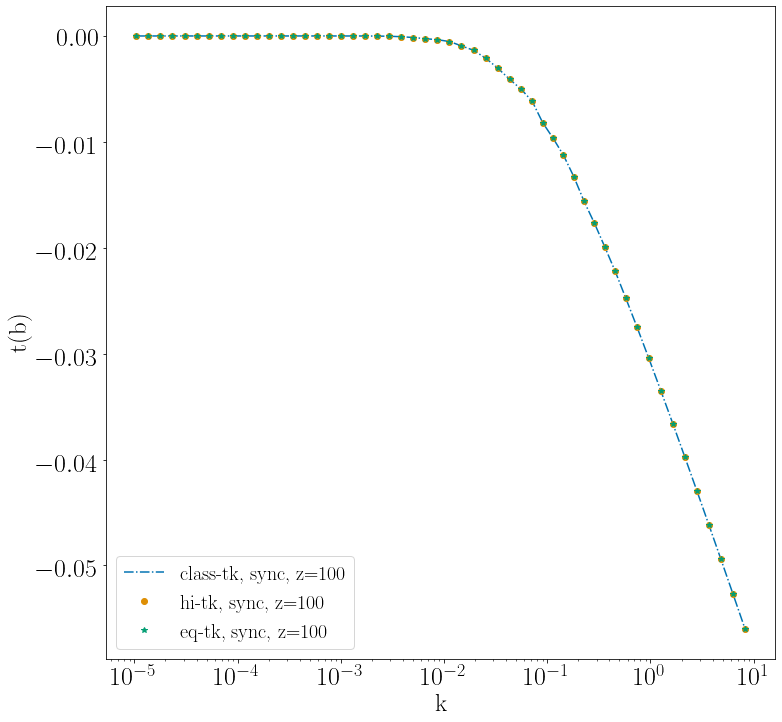

In [105]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(12,12))


l=0
column = 15
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['class-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1


column = 17
linestyle = ["-.","o","*","-,"]
gauge = 'sync'
numb = 7
for files in ['hi-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1

column = 19
for files in ['eq-tk']:
    for z in [100]:
#         print(z, files)
        data_p = data[files]['sync']['z='+str(z)]
        a = data_p[::numb,0]
        b = data_p[::numb,column]
        plt.plot(a, b,linestyle[l], color = Colors[l] , label =files + ", "+gauge+", z="+str(z))
        l=l+1
# plt.yscale('log')
plt.ylabel('t(b)',fontsize=25)
plt.xlabel('k',fontsize=25)

plt.xscale('log')
plt.legend(fontsize=20)


